In [41]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import json

In [32]:
votes_df = pd.read_csv(f"datasets/votacoesVotos-2021.csv", delimiter=";")
votes_df = votes_df[['idVotacao',
                         'deputado_id', 'deputado_nome',
                         'deputado_siglaPartido']]
votes_df = votes_df.rename(columns={"deputado_siglaPartido": "siglaBancada"})

votes_grouped_df = votes_df.groupby(by=["deputado_id", "deputado_nome", "siglaBancada"]).agg({'idVotacao': lambda x: ','.join(x),}).reset_index()
GO = nx.read_weighted_edgelist("networks/vote19-20-21-orientado.txt", nodetype=int)
GL = nx.read_weighted_edgelist("networks/vote19-20-21-liberado.txt", nodetype=int)

In [33]:
dep_sigla_dict = dict(zip(votes_grouped_df['deputado_id'], votes_grouped_df['siglaBancada']))
nx.set_node_attributes(GO, dep_sigla_dict, name="party")
nx.set_node_attributes(GL, dep_sigla_dict, name="party")

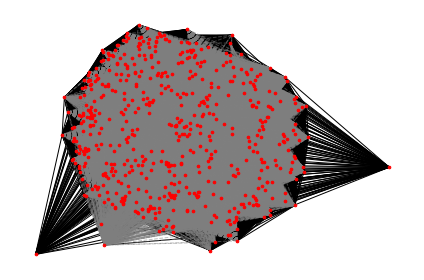

In [34]:
# Draw graph
elarge = [(u, v) for (u, v, d) in GO.edges(data=True) if d["weight"] >= 0.5]
esmall = [(u, v) for (u, v, d) in GO.edges(data=True) if d["weight"] < 0.5]

pos = nx.spring_layout(GO, seed=7)
nx.draw_networkx_nodes(GO, pos, node_size=7, node_color="red")
nx.draw_networkx_edges(GO, pos, edgelist=elarge, width=1)
nx.draw_networkx_edges(
    GO, pos, edgelist=esmall, width=1, alpha=0.5, edge_color="grey", style="dashed"
)
ax = plt.gca()
ax.margins(0.08)
plt.axis("off")
plt.tight_layout()
plt.show()

In [42]:
sl_o = dict(nx.all_pairs_dijkstra_path_length(GO))
sl_l = dict(nx.all_pairs_dijkstra_path_length(GL))

In [45]:
with open("networks/sl_orientado.json", 'w') as fp:
    json.dump(sl_o, fp)
with open("networks/sl_liberado.json", 'w') as fp:
    json.dump(sl_l, fp)